# Topic modelling using BERTopic

In [1]:
import utilities
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from hdbscan import HDBSCAN
from umap import UMAP
import pandas as pd
import pickle
from sentence_transformers     import SentenceTransformer

C:\Users\a.tekiouk\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\a.tekiouk\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\a.tekiouk\AppData\Local\Programs\Py

In [2]:
corpus_chan_10k = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/DATA/chanel10k.csv", sep=";", parse_dates=["publication_time"])

# on récupére les posts en anglais
mask = corpus_chan_10k["language"] == 'en'
corpus_chan_10k = corpus_chan_10k.loc[mask]

In [ ]:
with open('C:/Users/a.tekiouk/Sujet_2//Models/model_auc.pkl', 'rb') as f:
    model_f = pickle.load(f) # deserialize using load()
with open('C:/Users/a.tekiouk/Sujet_2//Models/opt_reducer.pkl', 'rb') as f:
    reducer_f = pickle.load(f) # deserialize using load()
corpus_filtered = utilities.junk_classifier(
    Corpus_instagram=corpus_chan_10k,
    model=model_f,
    reducer=reducer_f)
corpus_filtered.to_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/corpus_filtered.csv")

In [3]:
corpus_filtered = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/DATA/corpus_filtered.csv")
corpus_filtered = corpus_filtered.dropna(axis='rows')

In [4]:
stop_words = stopwords.words('english')

ENCODER_ID = "all-MiniLM-L6-v2"
encoder = SentenceTransformer(ENCODER_ID)

vectorizer = CountVectorizer(stop_words=stop_words)
                                             
umap = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan = HDBSCAN(min_cluster_size=35, min_samples=1, metric='euclidean', cluster_selection_method='eom')

bert_topic_model = BERTopic(
    embedding_model=encoder,
    umap_model=umap, 
    hdbscan_model=hdbscan,
    vectorizer_model=vectorizer,
    verbose=True
    )

docs = corpus_filtered['text'].tolist()

embeddings = encoder.encode(docs)

docs = corpus_filtered['text'].tolist()
bert_topic_model.fit(docs, embeddings)
print(f"Total topics found by BERTopic: {len(bert_topic_model.topic_labels_.keys())} (the topic -1 represents the outliers)")

2023-08-21 15:37:35,517 - BERTopic - Reduced dimensionality
2023-08-21 15:37:35,566 - BERTopic - Clustered reduced embeddings


Total topics found by BERTopic: 9 (the topic -1 represents the outliers)


In [5]:
bert_topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,186,-1_2023_new_follow_margot,"[2023, new, follow, margot, fashion, see, love...",[Margot Robbie | Barbie Press Day 1 | 24th Jun...
1,0,145,0_chanel_chanelofficial_de_bag,"[chanel, chanelofficial, de, bag, collection, ...",[[High Jewellery Focus] In an ode to Gabrielle...
2,1,67,1_summer_day_love_monday,"[summer, day, love, monday, happy, weekend, su...","[Summer 🤍., Ich liebe den Sommer 💙🌞 und vor al..."
3,2,58,2_jennie_concert_lily_depp,"[jennie, concert, lily, depp, rose, 제니, stage,...",[Tag for to celebrate JENNIE NEW MUSIC \n\n🚨St...
4,3,55,3_makeup_hair_make_portrait,"[makeup, hair, make, portrait, photographer, a...","[First presented in Dakar, Senegal, chaneloffi..."
5,4,53,4_skin_makeup_dress_outfit,"[skin, makeup, dress, outfit, summer, products...",[I actually feel like Christmas has come early...
6,5,46,5_big_ａｅｓｔｈｅｔｉｃ_serve_2023,"[big, ａｅｓｔｈｅｔｉｃ, serve, 2023, 𝟸𝟹, 𝒮𝓊𝓃𝒹𝒶𝓎, 𝒿𝑜𝒿𝑜...","[Big smile😸🐾💓, We Just 🛩Landed And Going For T..."
7,6,45,6_always_grateful_stop_bla,"[always, grateful, stop, bla, without, love, c...","[Love in human form!\n\nKovë, you bring the be..."
8,7,41,7_timothée_paris_masqbachatavipcongress_ela,"[timothée, paris, masqbachatavipcongress, ela,...","[Timothée on the streets, hunting Chanel ads i..."


In [18]:
bert_topic_model.visualize_topics()

In [18]:
bert_topic_model.visualize_heatmap()

In [19]:
bert_topic_model.visualize_hierarchy()

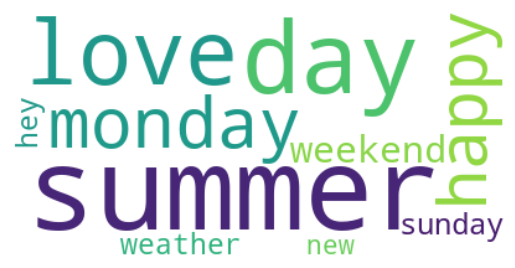

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

create_wordcloud(bert_topic_model, topic=1)